In [7]:
# import packages
import pandas as pd
from early_stopping_util import EarlyStoppingCallback
from models import fashion_mnist_classifier
from image_utils import display_image,load_image
from model_util import save_model,load_model 
from reporting_utils import batch_predict,predict_single,predict_images_from_test_set

2.4.0


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
model = fashion_mnist_classifier(optimizer='adam', loss='sparse_categorical_crossentropy')
# model fitting
history = model.fit(
        x_train,
        y_train,
        epochs=100,
        callbacks=[EarlyStoppingCallback()],
    )

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6331 - accuracy: 0.7777
0.8229166865348816
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8622
0.8644833564758301
Epoch 3/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3423 - accuracy: 0.8752
0.8771166801452637
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.8835
0.885699987411499
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2904 - accuracy: 0.8923
0.8922666907310486
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.8956
0.8961666822433472
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2617 - accuracy: 0.9018
0.9012166857719421
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2546 - accuracy: 0.9052
0.904283344745636
Epoch 9/100
1875/1875 [===

In [11]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7706 - accuracy: 0.8883

Test accuracy: 0.8883000016212463


In [12]:
save_model(model,'./models/multi_class_image_classifier')

INFO:tensorflow:Assets written to: ./models/multi_class_image_classifier/assets


'Dress'

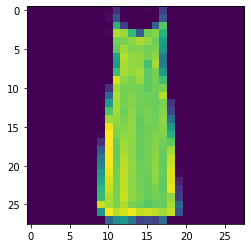

In [13]:
predict_images_from_test_set(model,x_test,class_names,13)

'Trouser'

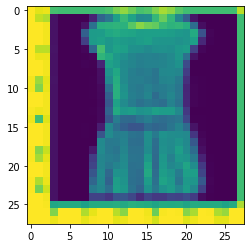

In [14]:

path = '/Users/prashunjaveri/Desktop/dress_1.jpeg'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
correct_predictions = pd.DataFrame({ 'predictions': [3]  })
model = load_model('./models/multi_class_image_classifier')
image_shape = (28,28,1)
predict_single(path=path,
               model=model,
               shape=(28,28,1), 
               classes=class_names, 
               show_image=True,
               grey_scale=True )

In [15]:
path = '/Users/prashunjaveri/Desktop/fashion_mnist'
batch_predict(path=path,
            model=model,
            shape=image_shape,
            classes=class_names,
            correct_predictions=correct_predictions,
            show_all = False ,
            grey_scale=True,
            show_correct = False)

{'errors': [{'file': 'dress_1.jpeg',
   'predictions': 1,
   'predicted_labels': 'Trouser',
   'expected': 3,
   'expected_labels': 'Dress'}],
 'percentage_error': 100.0}